In [8]:
import pickle
import os
import cv2
from tqdm import tqdm
from skimage.io import imread, imsave
from skimage.transform import resize
import numpy as np
from PIL import Image, ImageStat
from io import BytesIO
from multiprocessing import Pool
from keras.preprocessing import image as kimage
import keras.applications.resnet50 as resnet50
import keras.applications.xception as xception
import keras.applications.inception_v3 as inception_v3
import pandas as pd
from sklearn import preprocessing
from calcImgAtt import image_classify

In [3]:
resnet_model = resnet50.ResNet50(weights='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet')
xception_model = xception.Xception(weights='imagenet')

In [4]:
path = '../input/test_jpg_128/'
root, dirs, files = next(os.walk(path))

In [5]:
file = files[0]
key = os.path.splitext(os.path.basename(file))[0]
fpath = os.path.join(path, file)

In [ ]:
file

In [9]:

img = imread(fpath)
target_size = (224, 224)
if img.shape[:2] != target_size:
    img = resize(img, target_size, preserve_range=True)
resnet_preds = image_classify(resnet_model, resnet50, img)
xception_preds = image_classify(xception_model, xception, img)
inception_preds = image_classify(inception_model, inception_v3, img)

/home/kownse/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [19]:
inception_preds[0][1]

'folding_chair'

In [12]:
xception_preds

[('n03201208', 'dining_table', 0.20531783)]

In [13]:
resnet_preds

[('n03201208', 'dining_table', 0.34954175)]

In [14]:
import matplotlib.pyplot as plt

In [16]:
img = imread(fpath)

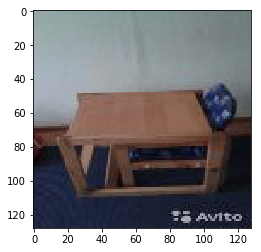

In [17]:
plt.imshow(img)